In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [4]:
daredevil_netflix_prep = pd.read_csv('daredevil_netflix_sentiment.csv')

In [5]:
daredevil_netflix_df = daredevil_netflix_prep.drop('Unnamed: 0', axis=1)

In [6]:
daredevil_netflix_df

,User_Ratings,Review_Dates,Titles,Reviews,Likes,Dislikes,Series,Network
0,10,"Feb 26, 2019",Daredevil won't stay down and neither will we,I was gutted when Daredevil was cancelled. Eas...,418,27,Daredevil,Netflix
1,9,"Oct 20, 2018",Season 3...,Let me start by saying Daredevil season 1 was ...,528,38,Daredevil,Netflix
2,10,"Mar 26, 2019",Easily the Best Show I've Ever Seen!,I seriously don't understand why Netflix would...,354,29,Daredevil,Netflix
3,10,"Dec 10, 2023",Absolutely Awesome,Daredevil was such an incredible show! Charlie...,145,9,Daredevil,Netflix
4,10,"Apr 16, 2020","If DC has The Dark Knight trilogy, well Marvel...",This is not your average super hero show. I lo...,278,22,Daredevil,Netflix
...,...,...,...,...,...,...,...,...
1071,9,"Apr 30, 2019",One of the best!!!,The show is one of the best you will find in s...,0,0,Daredevil,Netflix
1072,9,"Apr 28, 2015",This is actually very well done!,I wasn't expecting much from this series as it...,0,4,Daredevil,Netflix
1073,10,"Oct 28, 2018",AMAZING OMG!!!,This is must watch series on Netflix.... neat ...,0,1,Daredevil,Netflix
1074,10,"Apr 19, 2015",Frank Miller would be Proud!,It's obvious the Producers of this show did th...,0,7,Daredevil,Netflix


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment_vader = SentimentIntensityAnalyzer()
daredevil_netflix_df['Title_Sentiment_Score'] = daredevil_netflix_df['Titles'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])
daredevil_netflix_df['Review_Sentiment_Score'] = daredevil_netflix_df['Reviews'].apply(lambda text: sentiment_vader.polarity_scores(text)['compound'])

def sentiment_category_vader(sentiment):
        if sentiment >= 0.05:
            return "Positive"
        elif sentiment <= -0.05:
            return "Negative"
        else:
            return "Neutral"
        
daredevil_netflix_df['Title_sentiment_Vader'] = daredevil_netflix_df['Title_Sentiment_Score'].apply(sentiment_category_vader)
daredevil_netflix_df['Review_Sentiment_Vader'] = daredevil_netflix_df['Review_Sentiment_Score'].apply(sentiment_category_vader)

daredevil_netflix_df

,User_Ratings,Review_Dates,Titles,Reviews,Likes,Dislikes,Series,Network,Title_Sentiment_Score,Review_Sentiment_Score,Title_sentiment_Vader,Review_Sentiment_Vader
0,10,"Feb 26, 2019",Daredevil won't stay down and neither will we,I was gutted when Daredevil was cancelled. Eas...,418,27,Daredevil,Netflix,0.1280,0.7269,Positive,Positive
1,9,"Oct 20, 2018",Season 3...,Let me start by saying Daredevil season 1 was ...,528,38,Daredevil,Netflix,0.0000,0.9901,Neutral,Positive
2,10,"Mar 26, 2019",Easily the Best Show I've Ever Seen!,I seriously don't understand why Netflix would...,354,29,Daredevil,Netflix,0.7840,0.9819,Positive,Positive
3,10,"Dec 10, 2023",Absolutely Awesome,Daredevil was such an incredible show! Charlie...,145,9,Daredevil,Netflix,0.6590,0.9912,Positive,Positive
4,10,"Apr 16, 2020","If DC has The Dark Knight trilogy, well Marvel...",This is not your average super hero show. I lo...,278,22,Daredevil,Netflix,0.6597,0.9581,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,9,"Apr 30, 2019",One of the best!!!,The show is one of the best you will find in s...,0,0,Daredevil,Netflix,0.7249,0.7476,Positive,Positive
1072,9,"Apr 28, 2015",This is actually very well done!,I wasn't expecting much from this series as it...,0,4,Daredevil,Netflix,0.3989,0.9557,Positive,Positive
1073,10,"Oct 28, 2018",AMAZING OMG!!!,This is must watch series on Netflix.... neat ...,0,1,Daredevil,Netflix,0.6884,0.4588,Positive,Positive
1074,10,"Apr 19, 2015",Frank Miller would be Proud!,It's obvious the Producers of this show did th...,0,7,Daredevil,Netflix,0.5255,0.9810,Positive,Positive


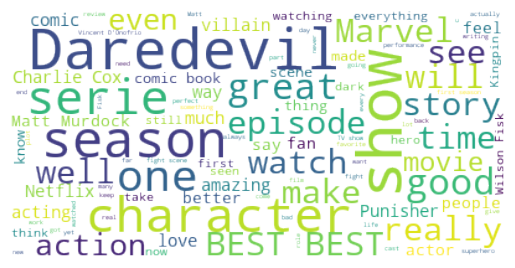

In [10]:
reviews = ' '.join(daredevil_netflix_df['Reviews'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(reviews)

wordcloud.words_

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
wordcloud.to_file("daredevil_netflix_wordcloud.png")

In [22]:
word_frequency = wordcloud.words_

words = word_frequency

word_frequency_original = pd.DataFrame(list(words.items()), columns=['words', 'frequency']) 

word_frequency_original.to_csv('word_frequency_netflix.csv')